## Loading the Dataset

In [1]:
#Libraries
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path1 = '/content/drive/MyDrive/bank-full.csv'
df1 = pd.read_csv(file_path1, delimiter=';')
df1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
file_path2 = '/content/drive/MyDrive/BA820, team 11/bank.csv'
df2 = pd.read_csv(file_path2, delimiter=';')
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [5]:
# Combining the two dataframes
combined_df = pd.concat([df1, df2], ignore_index=True)
combined_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [6]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


## Cleaning

As can see from the information about the dataset, there are no missing values. As of now, there is no change required in data type either. But we will do a sanity check and clean wherever required.

In [7]:
#Cross-check for missing values

missing_values = combined_df.isnull().any().any()
missing_values

False

In [8]:
#Cross-check data types

combined_df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


In [9]:
#Checking for duplicate values

duplicate_values = combined_df.duplicated().any()
duplicate_values

True

In [10]:
#Duplicate Values

duplicate_rows = combined_df[combined_df.duplicated()]
duplicate_rows

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45211,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
45212,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
45213,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
45214,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
45215,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49727,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
49728,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
49729,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
49730,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [11]:
#Removing duplicate rows

combined_df.drop_duplicates(inplace=True)

In [12]:
duplicate_values = combined_df.duplicated().any()
duplicate_values

False

## Dataset

In [13]:
combined_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.2+ MB


In [15]:
combined_df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
balance,int64
housing,object
loan,object
contact,object
day,int64


### **Data Dictionary**

- **Age**: Customer Age

- **Job**: Type of job (admin,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown)

- **Marital**: Marital status (divorced,married,single,unknown; note: divorced means divorced or widowed)

- **Education**: Education Level(Basic_4_year, Basic_6_year, Basic_9_year, High-School, Illiterate, Professional_course, University_Degree, Unknown)

- **Default**: Has credit in default

- **Balance**: Average yearly balance

- **Housing**: Has housing loan?

- **Loan**: Has personal loan?

- **Contact**: Contact Communication Type (Cellular, Telephone)

- **Day_of_Week**: Last contact day of the week.

- **Month**: Last contact month of year.

- **Duration:** Last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

- **campaign**: Number of contacts performed during this campaign and for this client (numeric, includes last contact)

- **pdays**: Number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)

- **previous**: Number of contacts performed before this campaign and for this client.

- **poutcome**: Outcome of the previous marketing campaign (failure,nonexistent,success)

- **Y**: Has the client subscribed a term deposit?





In [16]:
#Checking values in each column

def get_unique_values(df):
    unique_values = {col: df[col].unique() for col in df.columns}
    return unique_values

unique_values_dict = get_unique_values(combined_df)

for col, unique_vals in unique_values_dict.items():
    print(f"Column '{col}': {unique_vals}")

Column 'age': [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81 18 89
 84 87 92 93 88]
Column 'job': ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
Column 'marital': ['married' 'single' 'divorced']
Column 'education': ['tertiary' 'secondary' 'unknown' 'primary']
Column 'default': ['no' 'yes']
Column 'balance': [ 2143    29     2 ...  8205 14204 16353]
Column 'housing': ['yes' 'no']
Column 'loan': ['no' 'yes']
Column 'contact': ['unknown' 'cellular' 'telephone']
Column 'day': [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
Column 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Column 'duration': [ 261  151   76 ... 1298 1246 1556]
Column 'campa

OpenAI. (2025). ChatGPT (March 3 version) [Large language model]. https://chatgpt.com/share/67c626bd-eca8-8002-a6cc-142e6c99753d​

In [17]:
combined_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Exploratory Data Analysis

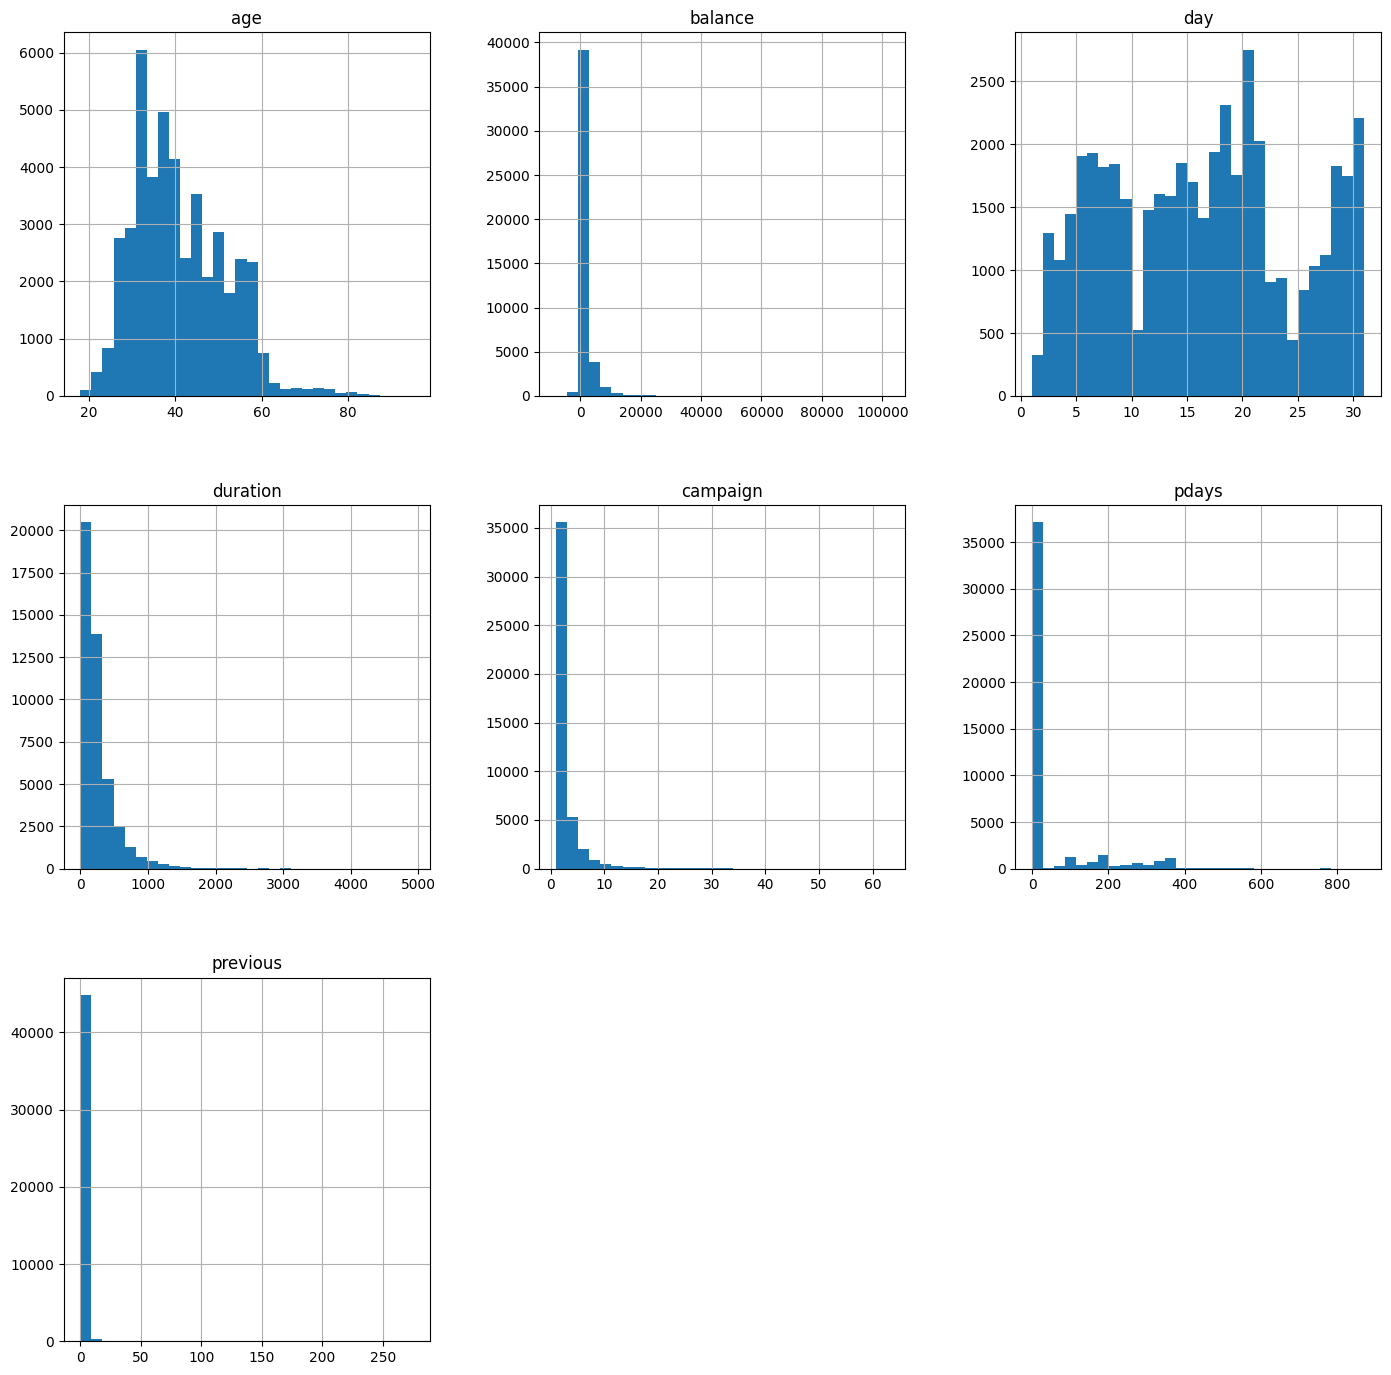

In [18]:
#Distribution of Numerical Columns
combined_df.hist(figsize=(17, 17), bins=30)
plt.show()

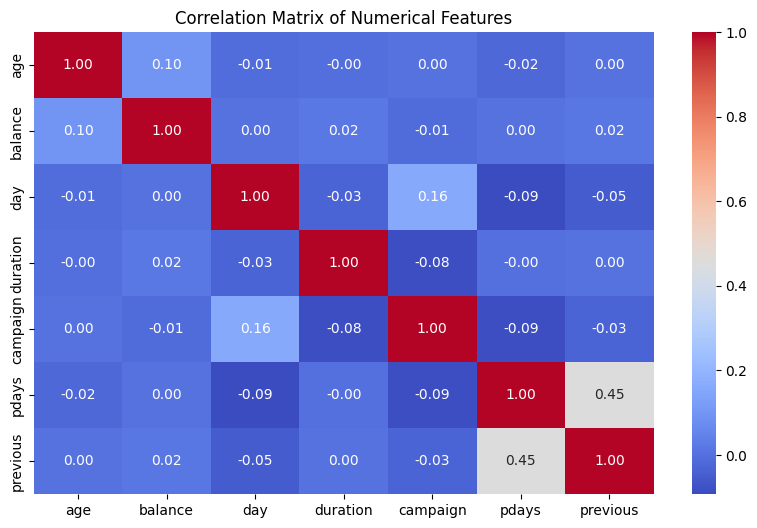

In [19]:
#Correlation of Numerical Features
numeric_df = combined_df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

Since no strong correlations exist, marketing strategies should rely on clustering techniques rather than simple correlation-based insights.

Segmenting customers based on multiple attributes (e.g., job type, education, and financial behavior) will likely be more effective than relying on linear relationships between numerical features.

The moderate correlation between pdays and previous suggests that past engagement influences future contact likelihood. This could be useful for designing follow-up strategies for past leads.

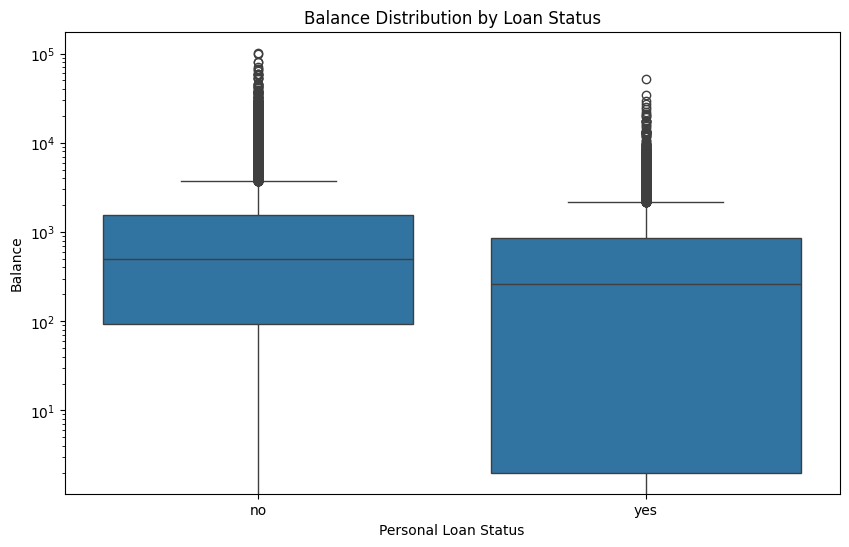

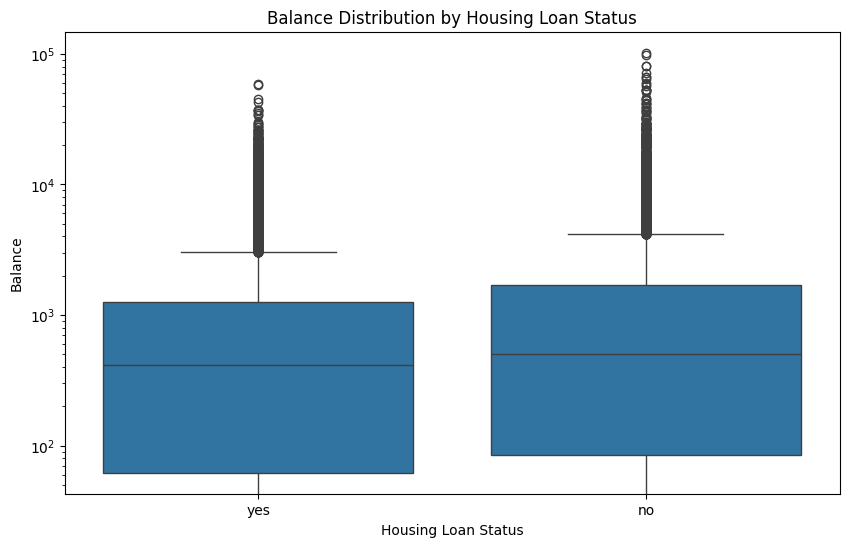

In [20]:
#Seeing Distribution of Balances as per Loan Status

plt.figure(figsize=(10, 6))
sns.boxplot(x="loan", y="balance", data=combined_df)
plt.title("Balance Distribution by Loan Status")
plt.xlabel("Personal Loan Status")
plt.ylabel("Balance")
plt.yscale("log")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x="housing", y="balance", data=combined_df)
plt.title("Balance Distribution by Housing Loan Status")
plt.xlabel("Housing Loan Status")
plt.ylabel("Balance")
plt.yscale("log")
plt.show()

People without personal loans tend to have higher account balances than those who take loans. There are many outliers, meaning some customers have very high balances, but most fall within a lower range. This suggests that financially stable customers may not need personal loans, while those with lower balances might rely on them more.

The median balance is similar for those with and without housing loans. This means that just having more money in the account doesn’t strongly predict whether someone has a housing loan. Other factors like income, job type, and credit history likely play a bigger role in getting approved.

These insights help us group customers into different financial profiles—some may have high balances but avoid loans, while others may need more financial support. This can also improve loan approval predictions and help banks offer the right services. For example, low-balance customers may benefit from financial guidance, while high-balance customers might be offered investment options.

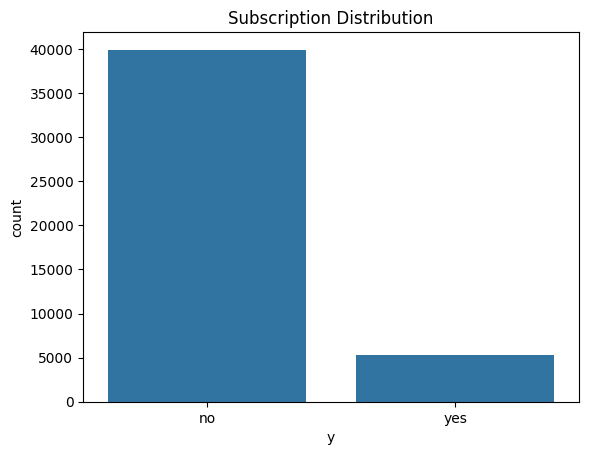

In [22]:
# Subscription Distribution
sns.countplot(x=combined_df['y'])
plt.title("Subscription Distribution")
plt.show()

In [24]:
# Checking Campaign Repsonse with various parameters

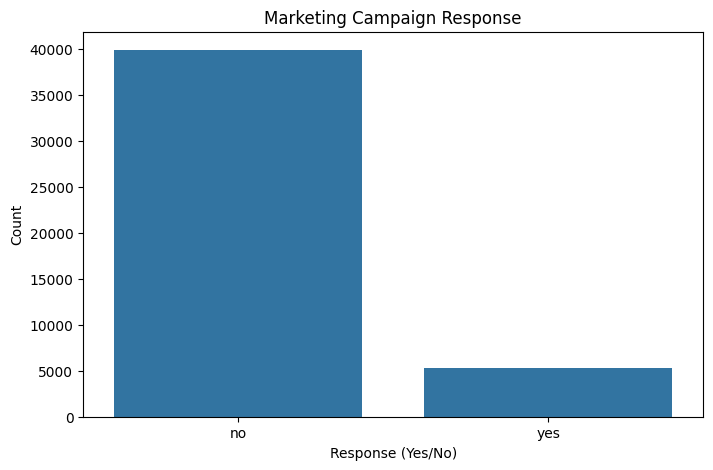

In [23]:
#Total Response
plt.figure(figsize=(8, 5))
sns.countplot(x="y", data=combined_df)
plt.title("Marketing Campaign Response")
plt.xlabel("Response (Yes/No)")
plt.ylabel("Count")
plt.show()

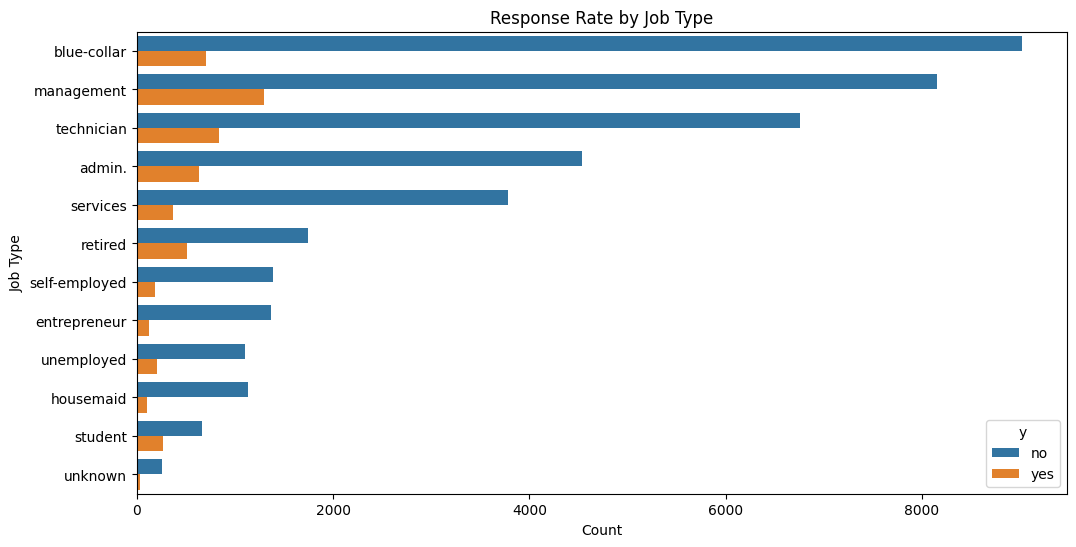

In [25]:
# Response by Job Type
plt.figure(figsize=(12, 6))
sns.countplot(y="job", hue="y", data=combined_df, order=combined_df["job"].value_counts().index)
plt.title("Response Rate by Job Type")
plt.xlabel("Count")
plt.ylabel("Job Type")
plt.show()

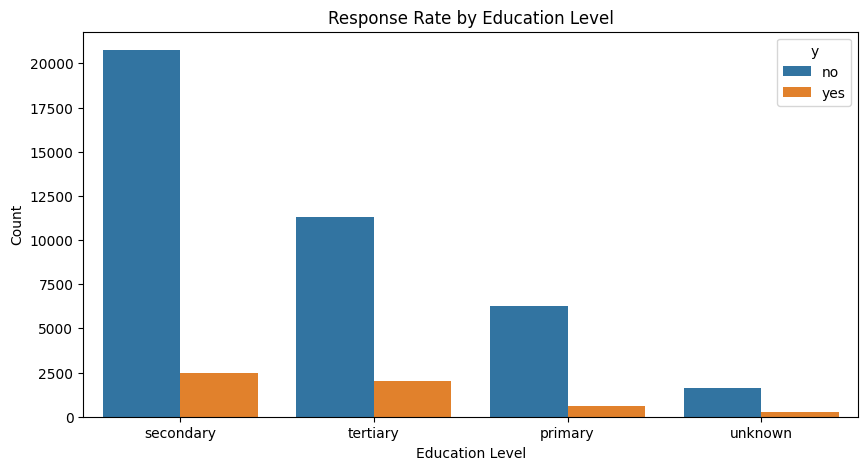

In [26]:
# Response by Education Level
plt.figure(figsize=(10, 5))
sns.countplot(x="education", hue="y", data=combined_df, order=combined_df["education"].value_counts().index)
plt.title("Response Rate by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

Most customers did not respond positively, suggesting the campaign needs better targeting and personalization.

Management, technicians, and blue-collar workers showed high participation but low conversion. Retired individuals were more likely to respond, while entrepreneurs, self-employed, and students had very low engagement.

Customers with secondary education participated the most but had a low response rate. Tertiary-educated individuals responded slightly better, while those with primary or unknown education showed the least interest.

The campaign needs more personalized offers. Retired and higher-educated customers may be more receptive, while blue-collar and management workers need better-tailored products. Future strategies should focus on segmentation to improve targeting.

In [27]:
# Age Study
Age_max = combined_df['age'].max()
Age_min = combined_df['age'].min()
Age_mean = combined_df['age'].mean()
print('Age_max:', Age_max)
print('Age_min:', Age_min)
print('Age_mean:', Age_mean)

Age_max: 95
Age_min: 18
Age_mean: 40.93621021432837


For the age destribution, we can find out that Average number of the customer would not take to use, people between 60 - 95 may become the key feature that effect the Average ages.

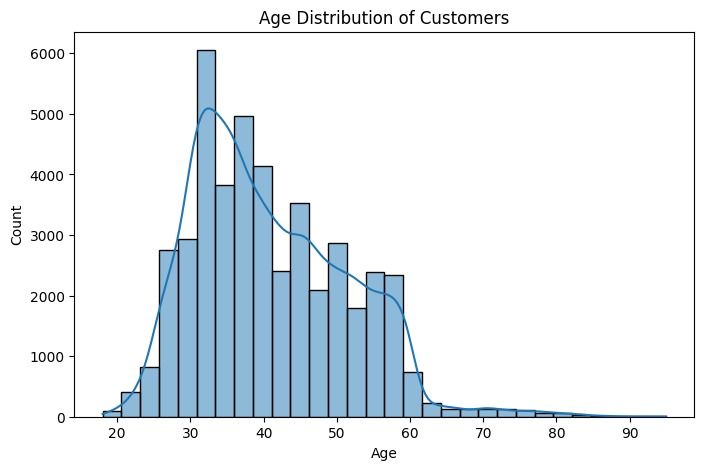

In [28]:
# Age distribution
plt.figure(figsize=(8, 5))
sns.histplot(combined_df["age"], bins=30, kde=True)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

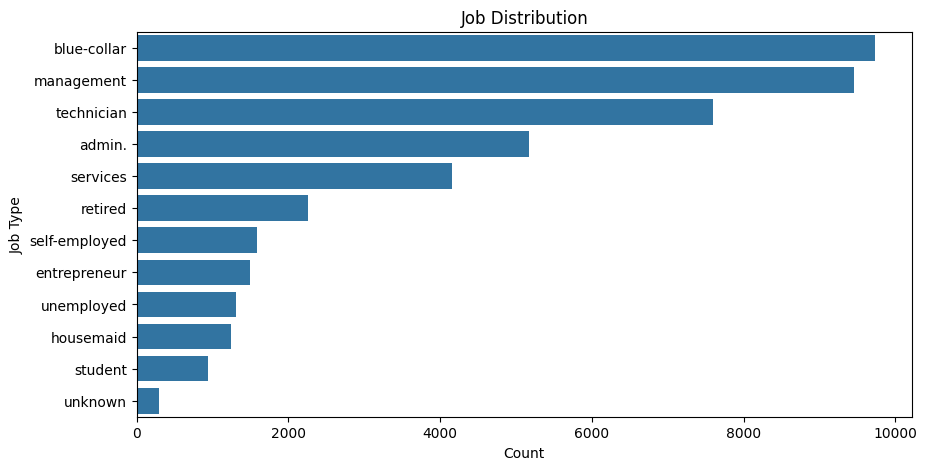

In [29]:
# Job distribution
plt.figure(figsize=(10, 5))
sns.countplot(y=combined_df["job"], order=combined_df["job"].value_counts().index)
plt.title("Job Distribution")
plt.xlabel("Count")
plt.ylabel("Job Type")
plt.show()

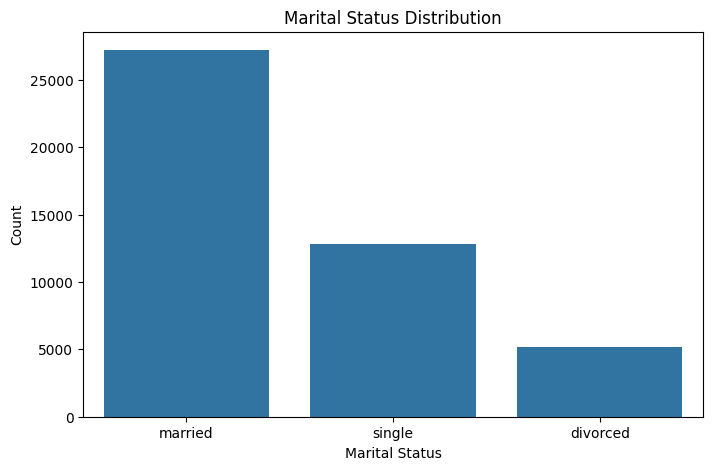

In [30]:
# Marital Status Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=combined_df["marital"], order=combined_df["marital"].value_counts().index)
plt.title("Marital Status Distribution")
plt.xlabel("Marital Status")
plt.ylabel("Count")
plt.show()

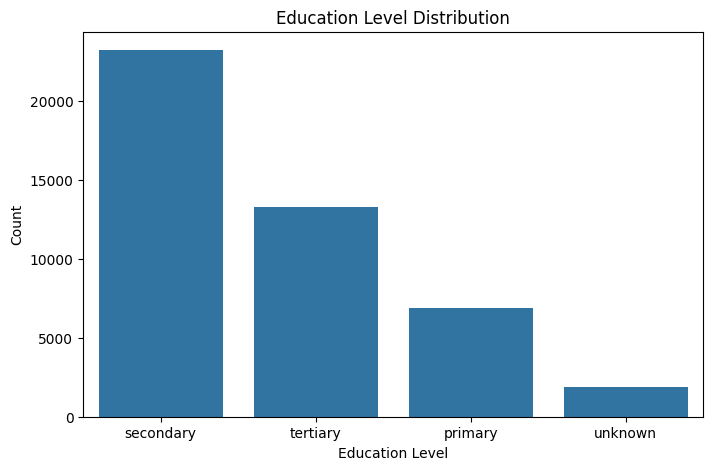

In [31]:
# Education Level Distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=combined_df["education"], order=combined_df["education"].value_counts().index)
plt.title("Education Level Distribution")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.show()

Most customers are between 30-50 years old, meaning they are likely in their peak earning years. This makes them a key target for financial products like loans, savings plans, and investments.

The largest groups work in blue-collar, management, and technician roles. Banks can tailor loan offers, credit cards, and investment plans to match their financial needs.

A majority are married, so there’s potential for family-oriented banking services, like joint accounts, home loans, and savings plans.

Most customers have a secondary or tertiary education, so financial products should be clear and practical, with premium options for those with higher education.

Knowing who the customers are helps in creating personalized marketing strategies. Instead of offering the same services to everyone, banks can focus on what different groups actually need, making campaigns more effective and improving customer engagement.

## Preliminary Analysis

Our project aims to segment customers and identify anomalies in financial behaviors. While clustering techniques help group customers based on similarity, Association Rule Mining (ARM) provides exploratory insights into relationships between categorical features such as education, job type, and communication methods.

### Pre-Processing

In [32]:
# Categorising Balances
balance_bins = [-np.inf, 0, 500, 5000, np.inf]
balance_labels = ['Negative', 'Low', 'Medium', 'High']
combined_df['balance_category'] = pd.cut(combined_df['balance'], bins=balance_bins, labels=balance_labels)

ChatGPT. (2025). Categorizing customer balances into meaningful groups for analysis [Large language model output]. OpenAI. https://chatgpt.com/share/67b6403d-b380-8002-90b1-317d8b7ba6de

In [33]:
combined_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_category
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,Medium
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,Low
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,Low
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,Medium
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,Low


In [34]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 45210
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               45211 non-null  int64   
 1   job               45211 non-null  object  
 2   marital           45211 non-null  object  
 3   education         45211 non-null  object  
 4   default           45211 non-null  object  
 5   balance           45211 non-null  int64   
 6   housing           45211 non-null  object  
 7   loan              45211 non-null  object  
 8   contact           45211 non-null  object  
 9   day               45211 non-null  int64   
 10  month             45211 non-null  object  
 11  duration          45211 non-null  int64   
 12  campaign          45211 non-null  int64   
 13  pdays             45211 non-null  int64   
 14  previous          45211 non-null  int64   
 15  poutcome          45211 non-null  object  
 16  y                 45211 non

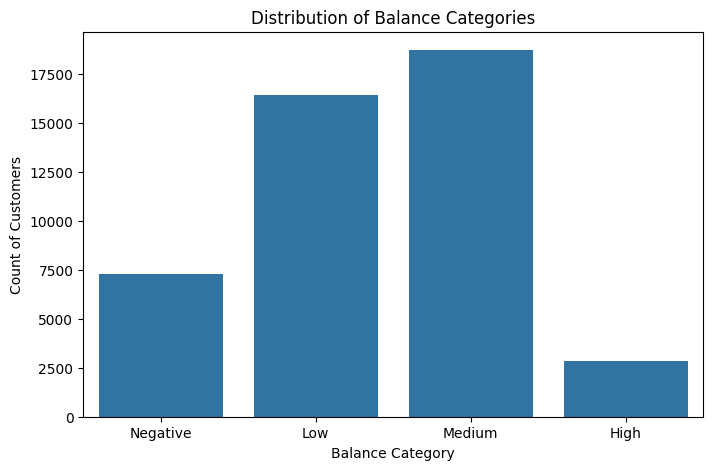

In [35]:
#Distribution of Balance Category

plt.figure(figsize=(8, 5))
sns.countplot(x=combined_df['balance_category'], order=['Negative', 'Low', 'Medium', 'High'])

# Add labels and title
plt.xlabel("Balance Category")
plt.ylabel("Count of Customers")
plt.title("Distribution of Balance Categories")

# Show the plot
plt.show()

Most customers have Medium or Low balances, while High balance customers are the least common. A good chunk also has Negative balances, which might mean financial struggles. This could be useful when deciding who to target for savings plans vs. financial support programs.

In [36]:
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y', 'balance_category']
df_transactions = combined_df[categorical_features].copy()

df_transactions = df_transactions.astype(str)

In [37]:
transactions = df_transactions.values.tolist()

encoder = TransactionEncoder()
encoded_array = encoder.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(encoded_array, columns=encoder.columns_)

df_encoded.head()

,High,Low,Medium,Negative,admin.,apr,aug,blue-collar,cellular,dec,...,services,single,student,success,technician,telephone,tertiary,unemployed,unknown,yes
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,True
1,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,True,False,False,False,True,True
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
3,False,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False


## Preliminary Analysis

By applying Apriori Algorithm, we sought to uncover patterns in customer demographics, financial behaviors, and marketing responses to help refine our segmentation approach and understand key interactions between features.

In [38]:
old_frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

old_frequent_itemsets

,support,itemsets
0,0.062927,(High)
1,0.362412,(Low)
2,0.413638,(Medium)
3,0.161023,(Negative)
4,0.114375,(admin.)
...,...,...
984,0.055938,"(management, tertiary, unknown, cellular, no, ..."
985,0.055916,"(management, tertiary, unknown, cellular, no, ..."
986,0.092301,"(secondary, unknown, cellular, no, yes, married)"
987,0.050054,"(tertiary, unknown, cellular, no, yes, married)"


In [39]:
frequent_itemsets = apriori(df_encoded, min_support=0.3, use_colnames=True)

frequent_itemsets

,support,itemsets
0,0.362412,(Low)
1,0.413638,(Medium)
2,0.647741,(cellular)
3,0.601933,(married)
4,0.304483,(may)
5,0.999845,(no)
6,0.513194,(secondary)
7,0.826547,(unknown)
8,0.693172,(yes)
9,0.362390,"(Low, no)"


We had earlier set the threshold at 0.05. This time, we set the minimum support at 0.3 to focus on meaningful and generalizable patterns, reducing the risk of including weak or overly niche associations that emerged at 0.05 while still capturing key insights into customer behavior.

In [40]:
frequent_itemsets.sort_values("support", ascending=False).head(10)

,support,itemsets
5,0.999845,(no)
7,0.826547,(unknown)
24,0.826414,"(unknown, no)"
8,0.693172,(yes)
25,0.693017,"(yes, no)"
2,0.647741,(cellular)
14,0.647608,"(cellular, no)"
3,0.601933,(married)
18,0.601845,"(married, no)"
28,0.552985,"(yes, unknown)"


In [41]:
print((combined_df == 'unknown').sum())

age                     0
job                   288
marital                 0
education            1857
default                 0
balance                 0
housing                 0
loan                    0
contact             13020
day                     0
month                   0
duration                0
campaign                0
pdays                   0
previous                0
poutcome            36959
y                       0
balance_category        0
dtype: int64


We analyzed the frequent appearance of 'unknown' in Apriori results to determine whether it represents missing data or meaningful insights. While 'unknown' in p-outcome indicates customers not previously contacted which is a useful insight, its occurrences in education, contact, and job were noise, so we plan to filter them out to refine our analysis.

In [42]:
df_filtered = combined_df[(combined_df['job'] != 'unknown') &
                 (combined_df['education'] != 'unknown') &
                 (combined_df['contact'] != 'unknown')]

In [43]:
df_filtered.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balance_category
12657,27,management,single,secondary,no,35,no,no,cellular,4,jul,255,1,-1,0,unknown,no,Low
12658,54,blue-collar,married,primary,no,466,no,no,cellular,4,jul,297,1,-1,0,unknown,no,Low
12659,43,blue-collar,married,secondary,no,105,no,yes,cellular,4,jul,668,2,-1,0,unknown,no,Low
12660,31,technician,single,secondary,no,19,no,no,telephone,4,jul,65,2,-1,0,unknown,no,Low
12661,27,technician,single,secondary,no,126,yes,yes,cellular,4,jul,436,4,-1,0,unknown,no,Low


In [44]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30907 entries, 12657 to 45210
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               30907 non-null  int64   
 1   job               30907 non-null  object  
 2   marital           30907 non-null  object  
 3   education         30907 non-null  object  
 4   default           30907 non-null  object  
 5   balance           30907 non-null  int64   
 6   housing           30907 non-null  object  
 7   loan              30907 non-null  object  
 8   contact           30907 non-null  object  
 9   day               30907 non-null  int64   
 10  month             30907 non-null  object  
 11  duration          30907 non-null  int64   
 12  campaign          30907 non-null  int64   
 13  pdays             30907 non-null  int64   
 14  previous          30907 non-null  int64   
 15  poutcome          30907 non-null  object  
 16  y                 30907

In [45]:
filtered_transactions = df_filtered[categorical_features].values.tolist()

filtered_encoded_array = encoder.fit(filtered_transactions).transform(filtered_transactions)
df_filtered_encoded = pd.DataFrame(filtered_encoded_array, columns=encoder.columns_)

In [46]:
df_filtered_encoded.head()

,High,Low,Medium,Negative,admin.,apr,aug,blue-collar,cellular,dec,...,services,single,student,success,technician,telephone,tertiary,unemployed,unknown,yes
0,False,True,False,False,False,False,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
1,False,True,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,True,False
2,False,True,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,False,False,True,True
3,False,True,False,False,False,False,False,False,False,False,...,False,True,False,False,True,True,False,False,True,False
4,False,True,False,False,False,False,False,False,True,False,...,False,True,False,False,True,False,False,False,True,True


In [47]:
frequent_itemsets_filtered = apriori(df_filtered_encoded, min_support=0.3, use_colnames=True)
frequent_itemsets_filtered

,support,itemsets
0,0.358915,(Low)
1,0.420293,(Medium)
2,0.912835,(cellular)
3,0.594655,(married)
4,0.999838,(no)
5,0.517811,(secondary)
6,0.344291,(tertiary)
7,0.746271,(unknown)
8,0.666677,(yes)
9,0.332287,"(Low, cellular)"


In [48]:
frequent_itemsets_filtered.sort_values("support", ascending=False).head(10)

,support,itemsets
4,0.999838,(no)
2,0.912835,(cellular)
15,0.912674,"(cellular, no)"
7,0.746271,(unknown)
26,0.746142,"(unknown, no)"
18,0.678034,"(unknown, cellular)"
39,0.677905,"(unknown, cellular, no)"
8,0.666677,(yes)
27,0.666516,"(yes, no)"
19,0.614780,"(yes, cellular)"


The frequent itemset analysis provides valuable insights into the most common financial and demographic patterns in our dataset.

One of the most notable observations is that low and medium-balance customers together make up a significant portion of the dataset, with low-balance customers accounting for 35.8% and medium-balance customers 42%. This reinforces the importance of tailoring financial products to customers with modest savings, such as low-risk savings plans and financial literacy programs. In contrast, negative and high-balance customers did not emerge as highly frequent, suggesting that truly high-value clients are a minority, and financially struggling customers may require more targeted support rather than broad-based marketing.

From a communication and marketing perspective, the dominance of "cellular" contact (91.2%) indicates that most customers are engaged through mobile banking and phone outreach. This emphasizes the need to optimize digital banking services, SMS promotions, and mobile-first financial products. Additionally, married customers (59.4%) appear frequently, which suggests potential opportunities for joint financial planning, family-oriented savings plans, and co-applicant loan products.

In terms of education levels, secondary education (51.7%) appears most frequently, followed by tertiary education (34.4%). This suggests that the bank's core customer base consists of individuals with moderate to higher educational backgrounds, who may be more receptive to investment opportunities, structured savings, or credit-building products.

The filtering of "unknown" values in job, education, and contact has improved the clarity of patterns, while retaining "unknown" in poutcome (previous campaign outcome) helps us understand the role of past customer interactions. The presence of "unknown" in frequent patterns suggests that a large portion of customers have no previous engagement with marketing campaigns, reinforcing the need for first-time customer acquisition strategies.

These insights will help refine targeted marketing strategies, optimize financial product offerings, and ensure that customer engagement aligns with behavioral trends.

In [49]:
rules = association_rules(frequent_itemsets_filtered, metric="confidence", min_threshold=0.7)

rules.sort_values("confidence", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,(Medium),(no),0.420293,0.999838,0.420261,0.999923,1.000085,1.0,0.000036,2.101466,0.000146,0.420315,0.524142,0.710126
61,"(secondary, unknown)",(no),0.382017,0.999838,0.381985,0.999915,1.000077,1.0,0.000029,1.910085,0.000125,0.382034,0.476463,0.690981
25,"(Medium, cellular)",(no),0.378587,0.999838,0.378555,0.999915,1.000076,1.0,0.000029,1.892937,0.000123,0.378604,0.471720,0.689265
1,(Low),(no),0.358915,0.999838,0.358883,0.999910,1.000072,1.0,0.000026,1.794577,0.000112,0.358930,0.442766,0.679426
76,"(secondary, unknown, cellular)",(no),0.347882,0.999838,0.347850,0.999907,1.000069,1.0,0.000024,1.739412,0.000105,0.347895,0.425093,0.673907
22,"(Low, cellular)",(no),0.332287,0.999838,0.332255,0.999903,1.000064,1.0,0.000021,1.661436,0.000096,0.332298,0.398111,0.666106
56,"(secondary, married)",(no),0.305432,0.999838,0.305400,0.999894,1.000056,1.0,0.000017,1.527162,0.000080,0.305440,0.345191,0.652672
28,"(Medium, unknown)",(no),0.301032,0.999838,0.301000,0.999893,1.000054,1.0,0.000016,1.505161,0.000078,0.301039,0.335619,0.650470
15,(secondary),(no),0.517811,0.999838,0.517747,0.999875,1.000037,1.0,0.000019,1.294529,0.000076,0.517797,0.227518,0.758853
37,"(secondary, cellular)",(no),0.473938,0.999838,0.473873,0.999863,1.000025,1.0,0.000012,1.184845,0.000048,0.473919,0.156008,0.736907


The association rule mining results provide a clearer understanding of customer behavior, particularly in terms of balance categories, education levels, and communication preferences.

One of the most dominant patterns is that customers with medium or low balances are highly associated with not subscribing to the bank’s term deposit offer. Similarly, customers with secondary education and those marked as "unknown" in certain attributes also show a strong likelihood of not subscribing. These findings suggest that the primary challenge for the bank is converting customers in the middle-income and lower education segments into subscribers, indicating a potential gap in financial awareness or product fit.

Additionally, cellular communication is the primary outreach method across all segments, yet its presence in high-confidence rules predicting non-subscription suggests that while mobile outreach is widespread, it may not be effectively influencing customer engagement. This could imply that customers are either unresponsive to phone-based marketing efforts or that the current messaging does not align with their financial interests.

Unlike our previous analysis, job categories no longer appear strongly, meaning that education and financial standing play a more significant role in customer decision-making. Furthermore, high-balance customers do not emerge in strong patterns, reinforcing that wealthier clients may require more personalized, case-by-case financial strategies rather than broad marketing efforts.

These insights suggest that the bank should rethink its outreach strategy, particularly for low- to medium-balance customers and those with secondary education. Instead of focusing solely on product promotion, a more effective approach may be to enhance financial education, refine personalized marketing messaging, and explore alternative engagement methods beyond cellular outreach to increase subscription rates.

## Further Analysis & Insights

### Customer Behaviour

**What type of customers are least likely to subscribe to a term deposit?**

In [51]:
rules_no = rules[rules['consequents'].astype(str).str.contains("no")]
rules_no.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3,(Medium),(no),0.420293,0.999838,0.420261,0.999923,1.000085,1.0,3.563807e-05,2.101466,1.462806e-04,0.420315,0.524142,0.710126
61,"(secondary, unknown)",(no),0.382017,0.999838,0.381985,0.999915,1.000077,1.0,2.944592e-05,1.910085,1.247391e-04,0.382034,0.476463,0.690981
25,"(Medium, cellular)",(no),0.378587,0.999838,0.378555,0.999915,1.000076,1.0,2.889109e-05,1.892937,1.228160e-04,0.378604,0.471720,0.689265
1,(Low),(no),0.358915,0.999838,0.358883,0.999910,1.000072,1.0,2.570865e-05,1.794577,1.117406e-04,0.358930,0.442766,0.679426
76,"(secondary, unknown, cellular)",(no),0.347882,0.999838,0.347850,0.999907,1.000069,1.0,2.392376e-05,1.739412,1.054658e-04,0.347895,0.425093,0.673907
22,"(Low, cellular)",(no),0.332287,0.999838,0.332255,0.999903,1.000064,1.0,2.140085e-05,1.661436,9.646503e-05,0.332298,0.398111,0.666106
56,"(secondary, married)",(no),0.305432,0.999838,0.305400,0.999894,1.000056,1.0,1.705640e-05,1.527162,8.040882e-05,0.305440,0.345191,0.652672
28,"(Medium, unknown)",(no),0.301032,0.999838,0.301000,0.999893,1.000054,1.0,1.634454e-05,1.505161,7.768716e-05,0.301039,0.335619,0.650470
15,(secondary),(no),0.517811,0.999838,0.517747,0.999875,1.000037,1.0,1.905903e-05,1.294529,7.634253e-05,0.517797,0.227518,0.758853
37,"(secondary, cellular)",(no),0.473938,0.999838,0.473873,0.999863,1.000025,1.0,1.196136e-05,1.184845,4.798233e-05,0.473919,0.156008,0.736907


Customers with medium and low account balances are among the least likely to subscribe to term deposits, with confidence levels nearing 99.99%. This suggests that even though they are financially stable, they may prioritize liquidity or have concerns about locking in funds for extended periods. Possible reasons include a lack of disposable income, uncertainty about future financial needs, or a preference for short-term financial commitments.

Another significant group that rejects term deposits comprises customers with secondary education and missing data ("unknown" attributes). This segment has extremely high rejection rates, indicating that gaps in financial awareness or incomplete engagement with the bank could be major deterrents. Customers with missing information may either be less involved with banking services or hesitant to commit to long-term savings due to uncertainty about financial products.

Additionally, cellular outreach appears ineffective in driving term deposit subscriptions. Despite the bank’s efforts to reach customers via mobile marketing, the data indicates that even when contacted through phone calls or SMS, customers continue to reject deposits. This raises concerns about the effectiveness of phone-based marketing strategies. The likely reasons could be a lack of trust in telemarketing, generic messaging that does not resonate with customers, or a preference for other engagement channels such as digital banking or in-person interactions.

**Are there financially stable customers who still reject term deposits?**

In [52]:
rules_financial_stable = rules[
    (rules['antecedents'].astype(str).str.contains("yes")) &
    (rules['consequents'].astype(str).str.contains("no"))
]

rules_financial_stable.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
64,"(secondary, yes)",(no),0.364481,0.999838,0.364416,0.999822,0.999984,1.0,-0.000006,0.911201,-0.000025,0.364451,-0.097452,0.682149
81,"(secondary, yes, cellular)",(no),0.337464,0.999838,0.337399,0.999808,0.999970,1.0,-0.000010,0.843660,-0.000045,0.337432,-0.185312,0.668631
19,(yes),(no),0.666677,0.999838,0.666516,0.999757,0.999919,1.0,-0.000054,0.666677,-0.000243,0.666516,-0.499976,0.833190
60,"(yes, married)",(no),0.395412,0.999838,0.395315,0.999755,0.999916,1.0,-0.000033,0.659020,-0.000138,0.395341,-0.517404,0.697567
48,"(yes, cellular)",(no),0.614780,0.999838,0.614618,0.999737,0.999899,1.0,-0.000062,0.614780,-0.000263,0.614618,-0.626599,0.807227
73,"(yes, married, cellular)",(no),0.358139,0.999838,0.358042,0.999729,0.999891,1.0,-0.000039,0.596898,-0.000170,0.358065,-0.675327,0.678914
67,"(yes, unknown)",(no),0.461611,0.999838,0.461481,0.999720,0.999881,1.0,-0.000055,0.577013,-0.000220,0.461496,-0.733062,0.730638
86,"(yes, unknown, cellular)",(no),0.422914,0.999838,0.422784,0.999694,0.999856,1.0,-0.000061,0.528642,-0.000250,0.422798,-0.891638,0.711273
84,"(secondary, yes)","(cellular, no)",0.364481,0.912674,0.337399,0.925699,1.014272,1.0,0.004748,1.175308,0.022141,0.359029,0.149159,0.647691
50,(yes),"(cellular, no)",0.666677,0.912674,0.614618,0.921912,1.010123,1.0,0.006159,1.118311,0.030065,0.637086,0.105794,0.797669


Interestingly, even customers who are financially engaged—such as those with active loans, past campaign interactions, or existing savings accounts—still exhibit high rejection rates for term deposits. Customers with secondary education remain hesitant to subscribe despite prior financial involvement. This suggests that financial literacy gaps, risk aversion, or a misalignment between product offerings and customer needs may be influencing their decisions. The data indicates that simply having experience with financial products does not necessarily translate to a willingness to invest in term deposits.

Another key finding is that past financial engagement does not guarantee future interest in deposits. Even customers who have previously said "yes" to other financial activities, such as loans or previous savings accounts, overwhelmingly reject term deposits. This means that prior participation in financial services is not a reliable predictor of future engagement. Customers might have taken loans or participated in financial programs out of necessity rather than as part of a long-term financial plan. This highlights the importance of continuously revalidating customer interest instead of assuming past behavior dictates future choices.

Furthermore, married customers, despite financial engagement, also tend to reject deposits. This pattern suggests that family financial priorities and joint decision-making could play a role in their hesitancy. Married individuals may need spousal agreement before committing to long-term savings, or they might be focusing on more immediate financial responsibilities such as household expenses or mortgage payments.

**Do financially vulnerable customers respond differently to deposit offers?**

In [54]:
rules_loan_yes = rules[
    (rules['antecedents'].astype(str).str.contains("loan_yes")) &
    (rules['consequents'].astype(str).str.contains("yes"))
]
rules_loan_yes.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [55]:
rules_loan_no = rules[
    (rules['antecedents'].astype(str).str.contains("loan_no")) &
    (rules['consequents'].astype(str).str.contains("yes"))
]
rules_loan_no.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


The analysis for this question did not yield strong patterns, as no significant associations were found between financially vulnerable customers and their likelihood to subscribe to term deposits. This could mean that financial vulnerability does not play a distinct role in influencing deposit decisions, or that other attributes such as education, past engagement, and outreach method have a stronger impact on customer behavior. It may also indicate that the dataset does not have a sufficiently defined segment for financially vulnerable individuals, making it harder to isolate their behavior.

**Insights**

Given these insights, it is crucial to rethink targeting strategies, refine outreach efforts, and tailor messaging to better engage different customer segments.

First, the bank should rethink its approach for medium and low-balance customers, who overwhelmingly reject term deposits. Instead of promoting long-term deposits, the bank could offer alternative financial products such as flexible savings accounts or short-term deposit plans. Additionally, financial planning resources could be introduced to help these customers understand the long-term benefits of structured savings.

Second, addressing financial literacy gaps is essential for customers with secondary education. Since this group consistently rejects term deposits despite financial engagement, targeted financial education campaigns could be beneficial. Simplifying banking products and using engaging content such as webinars or personalized outreach via email may prove more effective than cold calls.

Third, the bank should reconsider its cellular marketing approach, as phone-based outreach does not seem to increase subscription rates. Testing alternative engagement methods, such as personalized digital campaigns, mobile banking notifications, or in-person consultations, could lead to better customer responses. Additionally, improving call scripts and making promotional offers more relevant could enhance engagement.

Moreover, past financial engagement should not be assumed to predict future interest in deposits. The bank should implement follow-up surveys and feedback loops to understand why previously engaged customers are rejecting term deposits. Personalized deposit plans tailored to individual financial behaviors could improve conversion rates.

Finally, targeting married customers requires a different approach, as they may require spousal agreement or prioritize other financial commitments. Offering joint savings products or incentives for couples who invest together—such as higher interest rates on joint deposits—could make term deposits more appealing.

### Communication & Enagagement

**Does using cellular contact improve the likelihood of subscription?**

In [56]:
rules_cellular_yes = rules[
    (rules['antecedents'].astype(str).str.contains("cellular")) &
    (rules['consequents'].astype(str).str.contains("yes"))
]

rules_cellular_yes.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
54,"(secondary, cellular)",(yes),0.473938,0.666677,0.337464,0.712043,1.068047,1.0,0.021500,1.157541,0.121110,0.420175,0.136100,0.609115
83,"(secondary, cellular, no)",(yes),0.473873,0.666677,0.337399,0.712003,1.067988,1.0,0.021479,1.157383,0.120997,0.420094,0.135982,0.609047
85,"(secondary, cellular)","(yes, no)",0.473938,0.666516,0.337399,0.711906,1.068101,1.0,0.021512,1.157554,0.121200,0.420145,0.136110,0.609060


The data reveals that cellular communication has a positive correlation with subscription rates, particularly among customers with secondary education. Customers contacted via cellular means were 71.2% likely to subscribe, with a lift of 1.068, indicating a moderate but meaningful impact. This suggests that real-time verbal interaction allows for direct engagement, making it easier to persuade hesitant customers. It also implies that individuals with secondary education may be more receptive to phone conversations compared to those with higher education, who might prefer researching financial products independently.

Additionally, the data suggests that cellular contact is effective even for customers who initially rejected the offer. When customers who previously leaned towards “No” were contacted again via cellular outreach, they still had a 71.2% likelihood of subscribing, showing that skepticism can be overcome with follow-up calls. This emphasizes the importance of structured follow-ups and well-crafted call strategies to address concerns and convert hesitant customers.

**Does the month of contact affect subscription rates?**

In [57]:
rules_month = rules[
    (rules['antecedents'].astype(str).str.contains("month")) &
    (rules['consequents'].astype(str).str.contains("yes"))
]

rules_month.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


The analysis did not yield any significant findings regarding the influence of the month of contact on subscription rates. This suggests that seasonality does not play a major role in determining whether a customer subscribes to a term deposit. It may indicate that customer decisions are primarily influenced by individual financial circumstances, engagement strategies, and product appeal rather than the time of year they are contacted. However, further investigation with external economic factors (such as interest rate trends or seasonal income variations) may provide additional insights.

**Insights**

Optimizing engagement strategies can lead to higher subscription rates for the bank.

First, cellular outreach should be a prioritized engagement channel, particularly for customers with secondary education. Since they exhibit higher responsiveness to direct phone calls, the bank should refine its call strategies. Sales representatives should be trained to emphasize key benefits, provide clear explanations, and personalize conversations to make offers more compelling.

Second, follow-up calls should be systematically implemented to convert hesitant customers. The data shows that even customers who initially reject term deposits can be persuaded through strategic second-round engagement. Structuring follow-up calls with improved messaging, potential incentives, or testimonials from existing subscribers could increase conversions.

Third, multi-channel engagement should be tested to complement cellular outreach. While cellular contact shows a positive effect, the moderate lift (1.068) suggests that it should not be the sole focus. Combining phone calls with personalized digital marketing (e.g., emails, app notifications, or targeted online content) may enhance overall effectiveness.

Finally, since seasonality does not significantly influence subscription rates, outreach strategies should be continuous throughout the year, focusing on customer needs rather than timing. However, external economic conditions could still be considered to refine campaign planning.

### Demographic Patterns

**Does a customer’s education level influence their likelihood to subscribe?**

In [58]:
rules_education_yes = rules[
    (rules['antecedents'].astype(str).str.contains("secondary|tertiary")) &
    (rules['consequents'].astype(str).str.contains("yes"))
]

rules_education_yes.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
54,"(secondary, cellular)",(yes),0.473938,0.666677,0.337464,0.712043,1.068047,1.0,0.021500,1.157541,0.121110,0.420175,0.136100,0.609115
83,"(secondary, cellular, no)",(yes),0.473873,0.666677,0.337399,0.712003,1.067988,1.0,0.021479,1.157383,0.120997,0.420094,0.135982,0.609047
85,"(secondary, cellular)","(yes, no)",0.473938,0.666516,0.337399,0.711906,1.068101,1.0,0.021512,1.157554,0.121200,0.420145,0.136110,0.609060
21,(secondary),(yes),0.517811,0.666677,0.364481,0.703887,1.055813,1.0,0.019267,1.125658,0.109630,0.444484,0.111631,0.625299
65,"(secondary, no)",(yes),0.517747,0.666677,0.364416,0.703850,1.055757,1.0,0.019246,1.125517,0.109512,0.444405,0.111520,0.625232
66,(secondary),"(yes, no)",0.517811,0.666516,0.364416,0.703762,1.055881,1.0,0.019286,1.125729,0.109758,0.444458,0.111687,0.625255


The analysis shows that customers with secondary education are more likely to subscribe to term deposits compared to those with other education levels. The confidence level for this segment is 70.4%, and the lift values range between 1.05 and 1.07, indicating a moderate positive effect of secondary education on subscription likelihood. This suggests that individuals in this group see term deposits as a stable financial option, possibly due to limited access to high-risk investments like stocks or bonds.

Interestingly, even customers who initially rejected the offer ("No, Secondary") still had a strong likelihood of subscribing later, reinforcing the idea that multiple touchpoints or re-engagement efforts are essential for this segment. The data also indicates that cellular outreach is effective among secondary-educated customers, further emphasizing the need for direct engagement through follow-up calls.

**Do married customers behave differently from single customers in terms of subscription?**

In [59]:
rules_married = rules[
    rules['antecedents'].astype(str).str.contains("married")
]

rules_married.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
56,"(secondary, married)",(no),0.305432,0.999838,0.305400,0.999894,1.000056,1.0,1.705640e-05,1.527162,8.040882e-05,0.305440,0.345191,0.652672
57,"(unknown, married)",(no),0.449024,0.999838,0.448960,0.999856,1.000018,1.0,7.930969e-06,1.122561,3.206170e-05,0.449003,0.109180,0.724444
68,"(unknown, married, cellular)",(no),0.401398,0.999838,0.401333,0.999839,1.000001,1.0,2.261206e-07,1.003494,9.412322e-07,0.401372,0.003482,0.700618
13,(married),(no),0.594655,0.999838,0.594558,0.999837,0.999999,1.0,-8.647018e-07,0.991092,-3.587945e-06,0.594596,-0.008989,0.797245
31,"(married, cellular)",(no),0.534604,0.999838,0.534507,0.999818,0.999980,1.0,-1.057951e-05,0.891006,-4.252762e-05,0.534541,-0.122326,0.767206
60,"(yes, married)",(no),0.395412,0.999838,0.395315,0.999755,0.999916,1.0,-3.309735e-05,0.659020,-1.384619e-04,0.395341,-0.517404,0.697567
73,"(yes, married, cellular)",(no),0.358139,0.999838,0.358042,0.999729,0.999891,1.0,-3.912723e-05,0.596898,-1.702277e-04,0.358065,-0.675327,0.678914
36,"(yes, married)",(cellular),0.395412,0.912835,0.358139,0.905736,0.992223,1.0,-2.807130e-03,0.924688,-1.279845e-02,0.376945,-0.081446,0.649036
74,"(yes, married, no)",(cellular),0.395315,0.912835,0.358042,0.905713,0.992197,1.0,-2.815590e-03,0.924461,-1.283793e-02,0.376843,-0.081712,0.648972
75,"(yes, married)","(cellular, no)",0.395412,0.912674,0.358042,0.905491,0.992130,1.0,-2.840227e-03,0.923997,-1.295086e-02,0.376869,-0.082254,0.648895


Married customers show a strong tendency to reject term deposits, with confidence levels close to 99.98%, regardless of their education level or whether they were contacted via cellular outreach. This trend is particularly evident among married individuals with secondary education or unknown attributes, suggesting that their financial priorities may differ from those of single customers.

A key insight is that married customers with missing financial data ("Unknown" attributes) are also highly likely to reject term deposits, potentially indicating lower financial engagement or stability. While they are frequently contacted via cellular outreach, this approach does not significantly increase their likelihood of subscribing.

The findings suggest that married customers may be more focused on family financial obligations, homeownership, or joint financial decision-making, making them less likely to commit to a long-term deposit without additional incentives or tailored financial products.

**How does marital status impact subscription rates, especially when combined with other indicators?**

In [60]:
rules_married_no = rules[
    (rules['antecedents'].astype(str).str.contains("married")) &
    ((rules['antecedents'].astype(str).str.contains("secondary")) |
     (rules['antecedents'].astype(str).str.contains("unknown"))) &
    (rules['consequents'].astype(str).str.contains("no"))
]

rules_married_no.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
56,"(secondary, married)",(no),0.305432,0.999838,0.305400,0.999894,1.000056,1.0,1.705640e-05,1.527162,8.040882e-05,0.305440,0.345191,0.652672
57,"(unknown, married)",(no),0.449024,0.999838,0.448960,0.999856,1.000018,1.0,7.930969e-06,1.122561,3.206170e-05,0.449003,0.109180,0.724444
68,"(unknown, married, cellular)",(no),0.401398,0.999838,0.401333,0.999839,1.000001,1.0,2.261206e-07,1.003494,9.412322e-07,0.401372,0.003482,0.700618
71,"(unknown, married)","(cellular, no)",0.449024,0.912674,0.401333,0.893789,0.979308,1.0,-8.479726e-03,0.822196,-3.693190e-02,0.417896,-0.216255,0.666761


Expanding on the previous analysis, the data confirms that married customers with secondary education or unknown financial attributes overwhelmingly reject term deposits. Even when contacted via cellular outreach, these individuals remain unlikely to subscribe, indicating that the outreach method itself is not the issue—rather, the product offering may not align with their financial priorities.

Additionally, customers with unknown attributes appear less financially engaged, meaning they may require more than just marketing messages to consider subscribing. The data also shows that many married customers with missing information respond to phone contact but do not convert, reinforcing the need for a more personalized, data-driven approach to engagement.

**Are younger or older customers more likely to subscribe?**

In [71]:
rules_age = rules[
    (rules['antecedents'].astype(str).str.contains("age")) &
    (rules['consequents'].astype(str).str.contains("yes"))
]
rules_age.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


The analysis did not produce any significant association rules linking customer age to subscription rates, suggesting that age alone is not a strong determinant of a customer's likelihood to open a term deposit. This implies that customers across different age groups may respond similarly to term deposit offers, and other factors—such as financial stability, past banking behavior, or investment preferences—could have a greater influence. The absence of strong associations also indicates that age might interact with other variables, requiring a more segmented approach to uncover meaningful trends. Further analysis could explore whether different age groups exhibit unique patterns when combined with attributes like income levels, previous financial commitments, or engagement with past campaigns.

**Does an unknown attribute (e.g., missing education or past campaign engagement) impact subscription?**

In [61]:
rules_unknown = rules[
    (rules['antecedents'].astype(str).str.contains("unknown")) &
    (rules['consequents'].astype(str).str.contains("no"))
]

rules_unknown.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
61,"(secondary, unknown)",(no),0.382017,0.999838,0.381985,0.999915,1.000077,1.0,2.944592e-05,1.910085,1.247391e-04,0.382034,0.476463,0.690981
76,"(secondary, unknown, cellular)",(no),0.347882,0.999838,0.347850,0.999907,1.000069,1.0,2.392376e-05,1.739412,1.054658e-04,0.347895,0.425093,0.673907
28,"(Medium, unknown)",(no),0.301032,0.999838,0.301000,0.999893,1.000054,1.0,1.634454e-05,1.505161,7.768716e-05,0.301039,0.335619,0.650470
57,"(unknown, married)",(no),0.449024,0.999838,0.448960,0.999856,1.000018,1.0,7.930969e-06,1.122561,3.206170e-05,0.449003,0.109180,0.724444
68,"(unknown, married, cellular)",(no),0.401398,0.999838,0.401333,0.999839,1.000001,1.0,2.261206e-07,1.003494,9.412322e-07,0.401372,0.003482,0.700618
17,(unknown),(no),0.746271,0.999838,0.746142,0.999827,0.999988,1.0,-8.692032e-06,0.932839,-4.591030e-05,0.746166,-0.071997,0.873044
43,"(unknown, cellular)",(no),0.678034,0.999838,0.677905,0.999809,0.999971,1.0,-1.973111e-05,0.847543,-9.039279e-05,0.677927,-0.179882,0.838912
67,"(yes, unknown)",(no),0.461611,0.999838,0.461481,0.999720,0.999881,1.0,-5.474316e-05,0.577013,-2.202844e-04,0.461496,-0.733062,0.730638
86,"(yes, unknown, cellular)",(no),0.422914,0.999838,0.422784,0.999694,0.999856,1.0,-6.100335e-05,0.528642,-2.499686e-04,0.422798,-0.891638,0.711273
88,"(yes, unknown)","(cellular, no)",0.461611,0.912674,0.422784,0.915890,1.003524,1.0,1.484684e-03,1.038239,6.522564e-03,0.444335,0.036831,0.689564


Customers with missing attributes, such as unknown education level or past campaign engagement, overwhelmingly reject term deposits. The data shows that individuals with "unknown" values in key financial attributes have an extremely high likelihood of refusing the offer, regardless of other factors. This pattern is particularly strong among those with missing education data and married customers with incomplete financial profiles. Additionally, customers in this segment still reject term deposits even when contacted via phone, indicating that traditional outreach methods are ineffective in changing their behavior. While some of these customers do respond to phone calls, their lack of conversion suggests that they may be engaging out of curiosity rather than genuine interest in the product. This highlights a clear gap in engagement and trust, as missing information often correlates with lower financial involvement or uncertainty about long-term savings options.

**Insights**

Understanding customer demographics plays a crucial role in refining the bank’s term deposit marketing strategy. The analysis highlights distinct behavioral patterns across education levels, marital status, and missing customer attributes, all of which influence subscription likelihood.

First, customers with secondary education show a higher likelihood of subscribing compared to other education groups. This suggests that middle-income individuals with moderate financial awareness may find term deposits appealing if presented with the right incentives and clear communication. Given that even secondary-educated individuals who initially reject the offer may subscribe later, the bank should consider multi-step engagement strategies. Follow-ups with tailored messaging, educational resources, and simplified financial explanations could further improve conversion rates for this group.

Second, married customers overwhelmingly reject term deposits, particularly those with secondary education or missing personal data. While marital status itself may not directly drive rejection, it is often combined with financial constraints or competing household expenses. Instead of pushing standard term deposit products to this group, the bank should offer joint financial planning solutions, such as couple-focused savings accounts or flexible investment plans. Furthermore, engaging married customers through financial advisory services rather than direct sales tactics may yield better results.

Third, missing customer data ("unknown" attributes) is a strong predictor of rejection, indicating either disengagement or a lack of structured financial planning. Customers with unknown education, job, or financial history may be less familiar with banking products, making them hesitant to commit to long-term deposits. Bridging this data gap—either through improved profiling, targeted surveys, or structured onboarding processes—could enhance engagement and enable more personalized marketing efforts.

By aligning term deposit offerings with demographic insights, the bank can better cater to the needs of different customer segments, increase engagement among high-potential groups, and refine its approach to converting hesitant customers into long-term deposit holders.

### Financial History

**Are higher-balance customers more likely to subscribe?**

In [62]:
rules_highbalance_yes = rules[
    (rules['antecedents'].astype(str).str.contains("High")) &
    (rules['consequents'].astype(str).str.contains("yes"))
]

rules_highbalance_yes.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


The analysis did not reveal any significant association between customers with high balances and term deposit subscriptions. This indicates that simply having a higher account balance does not necessarily correlate with a greater likelihood of subscribing to a term deposit.

One possible explanation is that high-balance customers may already have their funds allocated in alternative financial products, such as investments, stocks, or high-yield savings accounts. Additionally, they may not perceive term deposits as an attractive option if they seek liquidity or higher returns. This suggests that targeting high-balance customers purely based on their financial standing may not be an effective strategy. Instead, a deeper understanding of their investment behavior and preferences is needed to craft tailored financial products that align with their goals.

**Do customers with loans behave differently when it comes to subscribing?**

In [65]:
rules_loan_yes = rules[
    (rules['antecedents'].astype(str).str.contains("loan_yes")) &
    (rules['consequents'].astype(str).str.contains("yes"))
]

rules_loan_yes.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [64]:
rules_loan_no = rules[
    (rules['antecedents'].astype(str).str.contains("loan_no")) &
    (rules['consequents'].astype(str).str.contains("yes"))
]

rules_loan_no.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


The data did not yield any significant patterns differentiating customers with loans from those without in terms of their likelihood to subscribe to term deposits. This suggests that the presence of a loan—whether personal, auto, or otherwise—does not appear to impact a customer's decision regarding long-term savings commitments.

This could indicate that individuals with loans may have varying financial mindsets—some may prioritize debt repayment over savings, while others might see structured savings as a way to secure financial stability. Without a clear trend, it may be beneficial to explore other financial behaviors (such as past savings history or investment habits) to determine stronger predictors of term deposit subscription.

**Does a customer’s housing loan status impact their likelihood to subscribe?**

In [66]:
rules_housing_yes = rules[
    (rules['antecedents'].astype(str).str.contains("housing_yes")) &
    (rules['consequents'].astype(str).str.contains("yes"))
]
rules_housing_yes.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [67]:
rules_housing_no = rules[
    (rules['antecedents'].astype(str).str.contains("housing_no")) &
    (rules['consequents'].astype(str).str.contains("yes"))
]
rules_housing_no.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


Similar to other loan-related factors, housing loan status did not show any direct correlation with term deposit subscriptions. This suggests that homeownership and mortgage obligations do not significantly influence whether a customer opts into a term deposit.

One possible reason is that customers with housing loans may have diverse financial priorities—some might be actively focused on mortgage repayment, while others may still have disposable income for savings. Additionally, term deposits and home loans serve different financial purposes, making their relationship less direct. Further segmentation may be needed to determine whether specific groups of homeowners (e.g., first-time buyers vs. long-term mortgage holders) exhibit different savings behaviors.

**Insights**

Given these insights, financial history alone does not strongly determine subscription likelihood for term deposits. Traditional assumptions, such as higher-balance customers being more inclined to invest or loan-holders having specific financial behaviors, do not hold significant weight based on the available data. Therefore, banks need to refine their targeting strategies beyond financial history alone.

First, rather than assuming that high-balance customers will be more willing to subscribe, banks should focus on behavioral engagement markers, such as transaction patterns, interest in savings-related products, or interactions with financial advisors. Personalized investment planning sessions or targeted promotions based on recent savings activity may be more effective than generic outreach to high-balance customers.

Second, since loan status (whether personal or housing-related) does not correlate strongly with subscription, campaign efforts should not assume that loan-holders will either be more or less inclined to invest in term deposits. Instead, banks should conduct further segmentation to understand customer liquidity preferences. Loan-holders might respond better to flexible deposit schemes or savings products with early withdrawal options rather than rigid term deposits.

Third, financial education initiatives could help increase engagement among customers with varying financial backgrounds. Some may not be aware of how term deposits fit into a broader wealth management strategy, and tailored educational content could help bridge this gap.

Finally, cross-selling strategies should be adapted to reflect these insights. Instead of blanket promotions for term deposits to financially stable customers, banks should introduce financial wellness consultations, offering term deposits as part of a holistic package of savings and investment tools.

By realigning targeting strategies away from traditional financial indicators and toward behavioral insights, banks can create more effective and engaging financial product offerings that resonate with customer needs.

### Campaign Impact

**Do different marketing campaign durations impact subscription rates?**

In [68]:
rules_campaign = rules[
    (rules['antecedents'].astype(str).str.contains("campaign")) &
    (rules['consequents'].astype(str).str.contains("yes"))
]
rules_campaign.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


The analysis did not reveal any significant patterns linking the duration of marketing campaigns to term deposit subscription rates. This suggests that simply extending or shortening the duration of a campaign does not inherently increase the likelihood of customer engagement or conversion.

This could indicate that factors other than duration—such as the content, timing, personalization, and customer segmentation—play a more crucial role in influencing customer decisions. If the campaign messaging does not align with customer needs, prolonging it may not yield better results. Alternatively, shorter, high-impact campaigns with targeted messaging might be just as effective as longer ones. Future analysis could focus on identifying whether specific time frames (e.g., end-of-month salary periods or tax season) influence customer engagement.

**Does previous campaign success / failure impact future subscription rates?**

In [69]:
rules_poutcome_success = rules[
    (rules['antecedents'].astype(str).str.contains("poutcome_success")) &
    (rules['consequents'].astype(str).str.contains("yes"))
]
rules_poutcome_success.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [70]:
rules_poutcome_failure = rules[
    (rules['antecedents'].astype(str).str.contains("poutcome_failure")) &
    (rules['consequents'].astype(str).str.contains("yes"))
]
rules_poutcome_failure.sort_values("confidence", ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


No strong correlation was found between past campaign outcomes and future subscription decisions. Customers who previously subscribed to a term deposit after a successful campaign were not necessarily more likely to subscribe again, just as those who declined in past campaigns did not show a consistent pattern of continued rejection.

This suggests that past campaign engagement does not serve as a strong predictor of future customer behavior. Customer decisions may be influenced by external factors such as financial circumstances, macroeconomic trends, or evolving personal financial goals. Instead of assuming that previously successful customers will always re-engage, campaign strategies should consider real-time financial data, behavioral changes, and updated customer profiles to tailor outreach efforts effectively.

**Insights**

The analysis reveals that neither campaign duration nor previous campaign success or failure strongly influences future subscription likelihood. This suggests that a broader, more personalized approach is required for campaign effectiveness rather than a one-size-fits-all model.

First, instead of relying on extended campaign durations to drive subscriptions, banks should optimize the quality and timing of their outreach. Since prolonged campaigns do not necessarily increase conversions, a data-driven, agile approach—such as shorter, targeted promotional bursts—may yield better results. Campaign effectiveness should be measured in real-time, and messaging should be adapted based on customer engagement levels.

Second, past campaign outcomes (whether successful or unsuccessful) do not necessarily predict future behavior. This means that banks should not exclusively target customers who responded positively to past efforts nor ignore those who previously declined. Instead, periodic re-engagement efforts should be implemented across different segments, testing variations in messaging, incentives, and communication channels.

Third, campaign messaging should be highly personalized to appeal to specific customer concerns and motivations. Customers may reject term deposits due to perceived risk, lack of liquidity, or limited understanding of benefits. Addressing these hesitations directly in marketing communications—through targeted content, educational outreach, or dynamic pricing options—could enhance engagement.

Finally, multi-channel marketing should be prioritized over extended campaign durations. A combination of digital, phone-based, and in-person marketing efforts, with A/B testing for effectiveness, will likely yield higher conversion rates than simply increasing the length of a campaign.

By shifting from prolonged, generalized campaigns to dynamic, data-driven marketing strategies, banks can improve customer engagement, increase term deposit uptake, and enhance overall campaign effectiveness.